# CCE3206 - Practical 1 - The sampling theorem
# Graham Pellegrini 0352804L


## Tasks

## Check the numpy and scipy versions

In [57]:
import numpy as np
import scipy as sp

# Check the numpy and scipy versions
print("Numpy version: ", np.__version__)
print("Scipy version: ", sp.__version__)


Numpy version:  1.26.4
Scipy version:  1.12.0


### 1. Generating Signals

Setting up the simulation parameters as stated in the practical sheet and using relevant code to to set up the an effective sampling of sine wave x(n) by p(n) the pulse train signal. So y(n) = x(n)p(n) where x(n) is the sine wave signal and p(n) is the pulse train signal. The simulation is sampled at 10kHz.

In [58]:
# Seeting the simulation parameters
duration = 0.1
N = 1000 
train_period = 10
pulse_width = 1

# Simulation sampled at 10kHz

# Create a time vector `t` with 1000 samples evenly spaced in the interval [0, 0.1)
t = np.linspace(0, duration, N, endpoint=False)

# Generate the sine wave signal x(t) with a frequency of 100 Hz
x = np.sin(2 * np.pi * 100 * t)

# Generate the pulse train signal p(t)
p = np.arange(N) % train_period < pulse_width

# Compute the sampled sine wave y(t) by multiplying x(t) with p(t)
y = x * p

### 2. Compute Power Spectrum
Computinf the power spectrum of the signals. |X(F)|^2 is the power spectrum of the input signal x(t), |P(F)|^2 is the power spectrum of the pulse train signal p(t), and |Y(F)|^2 is the power spectrum of the sampled sine wave signal y(t). 

In [59]:
# Import the fft and fftfreq functions from the scipy.fftpack library
from scipy.fftpack import fft, fftfreq

# F is the list of frequencies for the DFT 
F = fftfreq(N, duration / N)

# 𝑋(𝐹) is the DFT of 𝑥(𝑡)
X = fft(x) / N
# the power spectrum of 𝑋(𝐹) is |𝑋(𝐹)|2
Xp = np.abs(X) ** 2
# Repeat for 𝑃(𝐹) and 𝑌 (𝐹)

# Compute the DFT of the pulse train signal p(t)
P = fft(p) / N
# Compute the power spectrum of P(F)
Pp = np.abs(P) ** 2

# Compute the DFT of the sampled sine wave signal y(t)
Y = fft(y) / N
# Compute the power spectrum of Y(F)
Yp = np.abs(Y) ** 2


### 3. Plot signals

#### Time domain plot
Plotting the time domain signals, having a limited range of 0 to 0.05 seconds so that the signals properties may be clearly observed and compared with later plots.

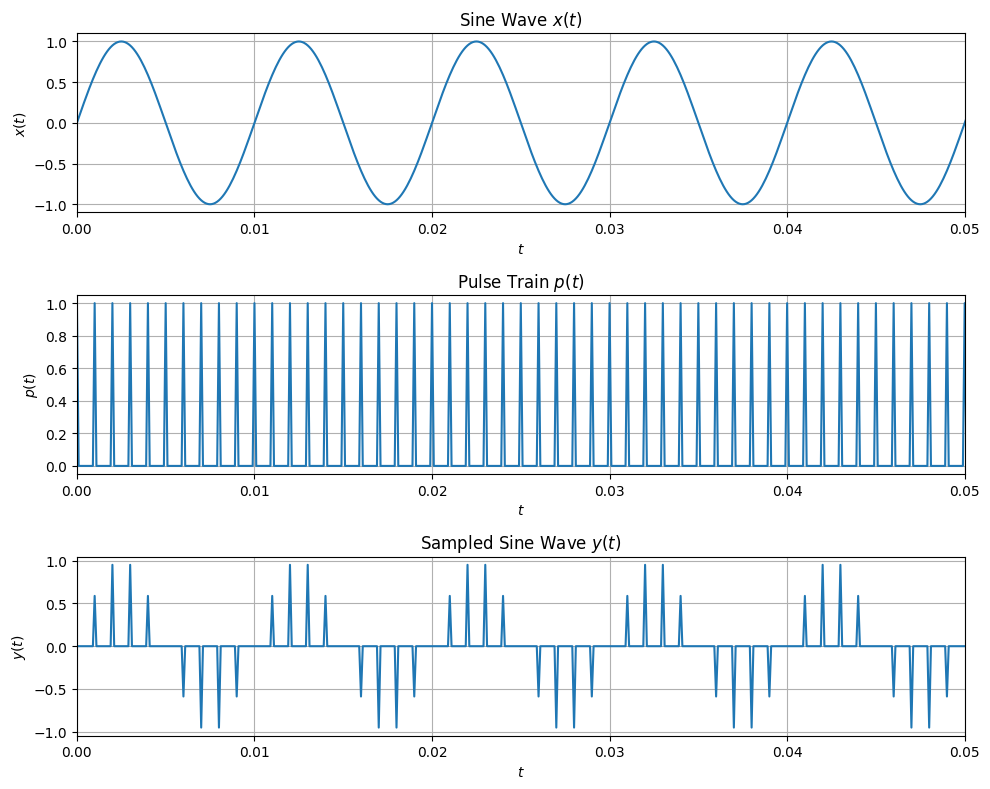

In [60]:
# Import the matplotlib.pyplot library
import matplotlib.pyplot as plt

# Plot the time domain signals x(t), p(t), and y(t)
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Plot x(t)
ax[0].plot(t, x)
ax[0].set_xlim([0, 0.05])
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')
ax[0].set_title('Sine Wave $x(t)$')
ax[0].grid(True)

# Plot p(t)
ax[1].plot(t, p)
ax[1].set_xlim([0, 0.05])
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$p(t)$')
ax[1].set_title('Pulse Train $p(t)$')
ax[1].grid(True)

# Plot y(t)
ax[2].plot(t, y)
ax[2].set_xlim([0, 0.05])
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$y(t)$')
ax[2].set_title('Sampled Sine Wave $y(t)$')
ax[2].grid(True)

plt.tight_layout()
plt.show()

#### Frequency domain plot
Plotting the frequency domain signals, with a x limt of [-2400, 2400] so that we can analyze the plot for sampling its effective sampling frequency and comparision with later plots.

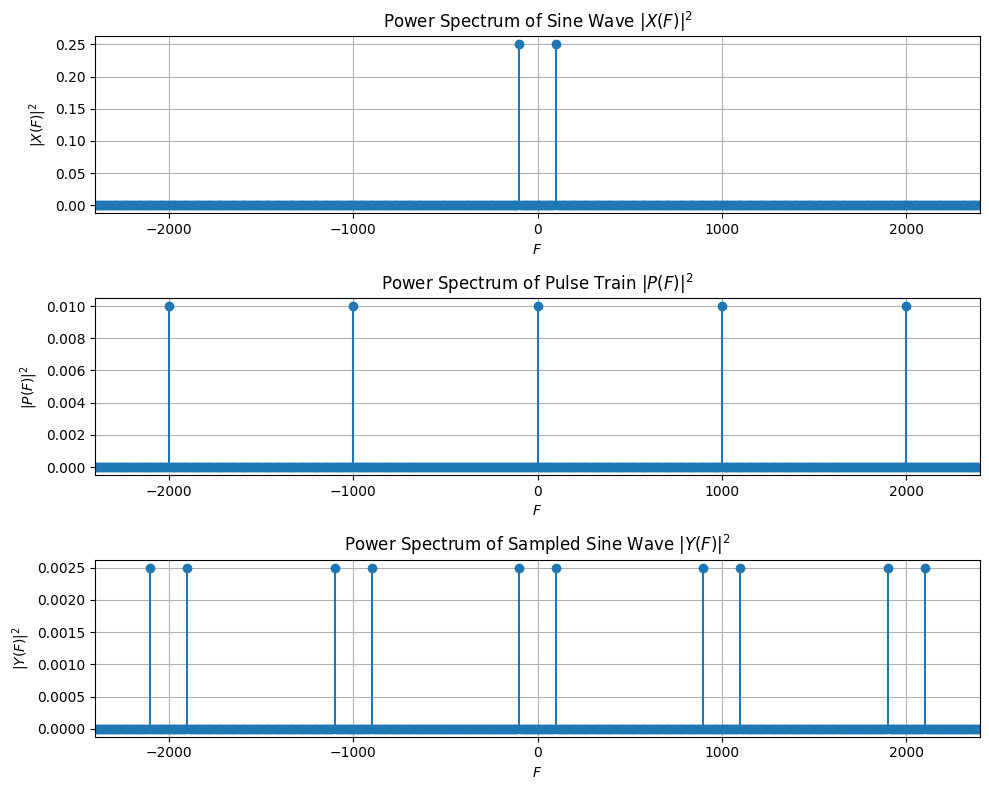

In [61]:
# Plot the power spectrum of the frequency domain signals |X(F)|^2, |P(F)|^2, and |Y(F)|^2
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Plot |X(F)|^2
ax[0].stem(F, Xp, basefmt=" ")
ax[0].set_xlim([-2400, 2400])
ax[0].set_xlabel('$F$')
ax[0].set_ylabel('$|X(F)|^2$')
ax[0].set_title('Power Spectrum of Sine Wave $|X(F)|^2$')
ax[0].grid(True)

# Plot |P(F)|^2
ax[1].stem(F, Pp, basefmt=" ")
ax[1].set_xlim([-2400, 2400])
ax[1].set_xlabel('$F$')
ax[1].set_ylabel('$|P(F)|^2$')
ax[1].set_title('Power Spectrum of Pulse Train $|P(F)|^2$')
ax[1].grid(True)

# Plot |Y(F)|^2
ax[2].stem(F, Yp, basefmt=" ")
ax[2].set_xlim([-2400, 2400])
ax[2].set_xlabel('$F$')
ax[2].set_ylabel('$|Y(F)|^2$')
ax[2].set_title('Power Spectrum of Sampled Sine Wave $|Y(F)|^2$')
ax[2].grid(True)

plt.tight_layout()
plt.show()

### 4. Determine Effective Sampling Frequency
By observing the plot in task 3 we can see that the power spectrum of the pulse train signal P(F) is repeated at peroids of 1000Hz. Therefore, the effective sampling frequency we expect to see in the power spectrum of the sampled sine wave signal Y(F) is 1000Hz. This can be calculated by taking the inverse of the product of the pulse train period and the fraction of duration over number of samples. That is the inverse since frequency is the reciprocal of period, of the product of train_period by duraction per sample.

Effective Sampling Frequency: 1000.0 Hz


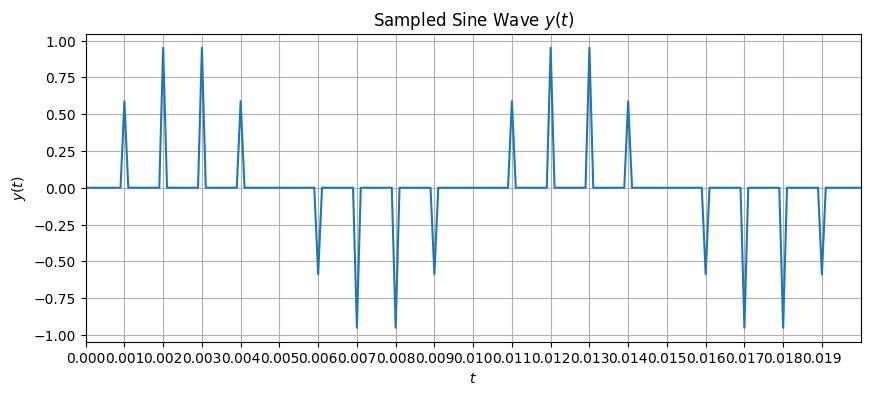

In [62]:
# Determine the effective sampling frequency for the sine wave
effective_sampling_frequency = 1 / (train_period * (duration / N))

# Print the effective sampling frequency
print(f"Effective Sampling Frequency: {effective_sampling_frequency} Hz")

# Confirm the effective sampling frequency by observing the time domain plot of y(t)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# Plot y(t)
ax.plot(t, y)
ax.set_xlim(0, 0.02)
# Set ticks on the x-axis at multiples of the effective sampling frequency
ax.set_xticks(np.arange(0, 0.02, 1/effective_sampling_frequency))
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')
ax.set_title('Sampled Sine Wave $y(t)$')
ax.grid(True)



### 5. Record Frequency Components
The simulated sampling rate is the sampling frequency of the sine wave. Which in our case is 10kHz or samples per duration. So to record the frequency components and their power for the unsampled sine wave x(t) would be the same as the sampled sine wave y(t) but scaled by the ratio of the simulated sampling rate to the effective sampling frequency. That is the x(t) frequency components would be the first y(t) frequency components and then the following frequency components would be scaled by the ratio of the simulated sampling rate to the effective sampling frequency.

In [63]:
# Simulation sampling rate
Fsim = N / duration

# Effective sampling frequency for the sine wave
Fs = effective_sampling_frequency

# Record the frequency components and their power for the unsampled sine wave x(t)
unsampled_freq_components = F[np.where(Xp > 1e-6)]  
unsampled_power_components = Xp[np.where(Xp > 1e-6)]

# Record the frequency components and their power for the sampled sine wave y(t)
sampled_freq_components = F[np.where(Yp > 1e-6)]
sampled_power_components = Yp[np.where(Yp > 1e-6)] * (Fsim / Fs) ** 2

# Print the frequency components and their power for the unsampled sine wave
print("Unsampled Sine Wave Frequency Components and Power:")
for freq, power in zip(unsampled_freq_components, unsampled_power_components):
    print(f"Frequency: {freq:.2f} Hz, Power: {power:.6f}")

# Print the frequency components and their power for the sampled sine wave
print("\nSampled Sine Wave Frequency Components and Power:")
for freq, power in zip(sampled_freq_components, sampled_power_components):
    print(f"Frequency: {freq:.2f} Hz, Power: {power:.6f}")

Unsampled Sine Wave Frequency Components and Power:
Frequency: 100.00 Hz, Power: 0.250000
Frequency: -100.00 Hz, Power: 0.250000

Sampled Sine Wave Frequency Components and Power:
Frequency: 100.00 Hz, Power: 0.250000
Frequency: 900.00 Hz, Power: 0.250000
Frequency: 1100.00 Hz, Power: 0.250000
Frequency: 1900.00 Hz, Power: 0.250000
Frequency: 2100.00 Hz, Power: 0.250000
Frequency: 2900.00 Hz, Power: 0.250000
Frequency: 3100.00 Hz, Power: 0.250000
Frequency: 3900.00 Hz, Power: 0.250000
Frequency: 4100.00 Hz, Power: 0.250000
Frequency: 4900.00 Hz, Power: 0.250000
Frequency: -4900.00 Hz, Power: 0.250000
Frequency: -4100.00 Hz, Power: 0.250000
Frequency: -3900.00 Hz, Power: 0.250000
Frequency: -3100.00 Hz, Power: 0.250000
Frequency: -2900.00 Hz, Power: 0.250000
Frequency: -2100.00 Hz, Power: 0.250000
Frequency: -1900.00 Hz, Power: 0.250000
Frequency: -1100.00 Hz, Power: 0.250000
Frequency: -900.00 Hz, Power: 0.250000
Frequency: -100.00 Hz, Power: 0.250000


### 6. Change Sine Wave Frequency to 800 Hz

With the sine wave frequency set to 800 Hz, x_800Hz(t) now completes about 40 cycles within 0.05 seconds. Sampling this with the same pulse train p(t) creates y_800Hz(t), which may show fewer points per cycle or aliasing if the sampling rate isn’t high enough.

The sampled signal y_800Hz(t) reflects this 800 Hz frequency but may experience "folding" into lower frequencies if the sampling rate does not satisfy the Nyquist criterion, potentially distorting its frequency content.

In the frequency domain, |X_800Hz(F)|^2 shows peaks at ±800 Hz, indicating the sine wave’s main frequency. The sampled signal’s spectrum |Y_800Hz(F)|^2  may also peak at ±800 Hz but can show lower-frequency artifacts if aliasing occurs.

Finally, due to the periodic sampling, |Y_800Hz(F)|^2 may display regularly spaced peaks, overlapping around primary frequencies and creating artifacts if the frequency content surpasses the sampling limits.

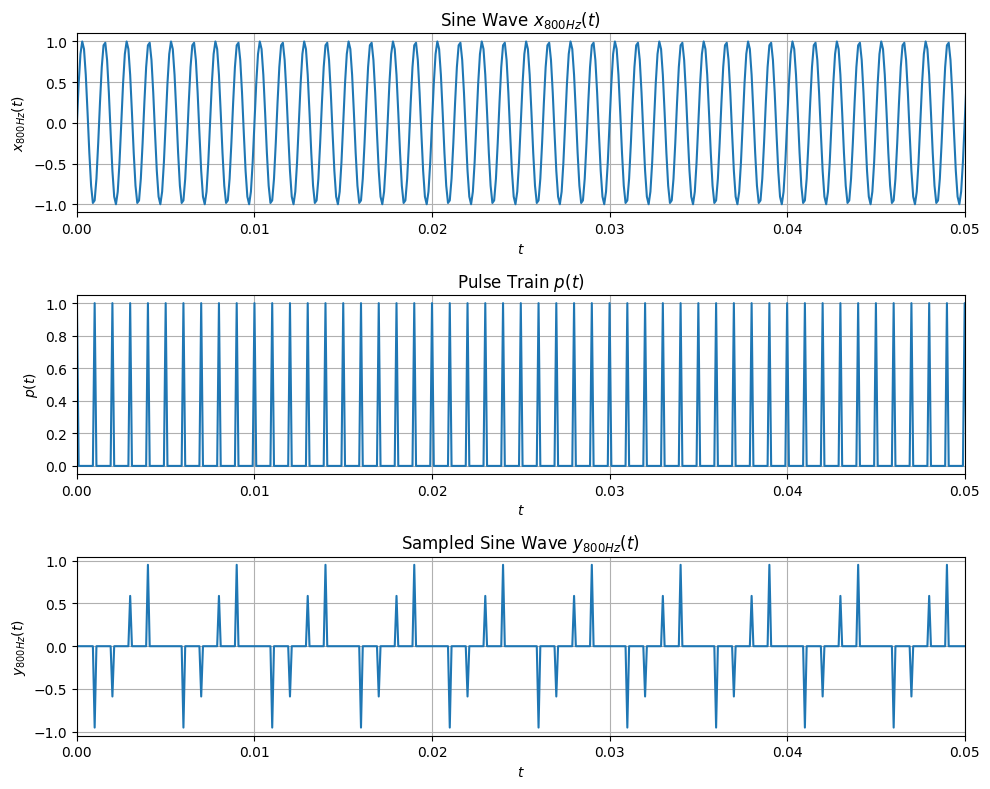

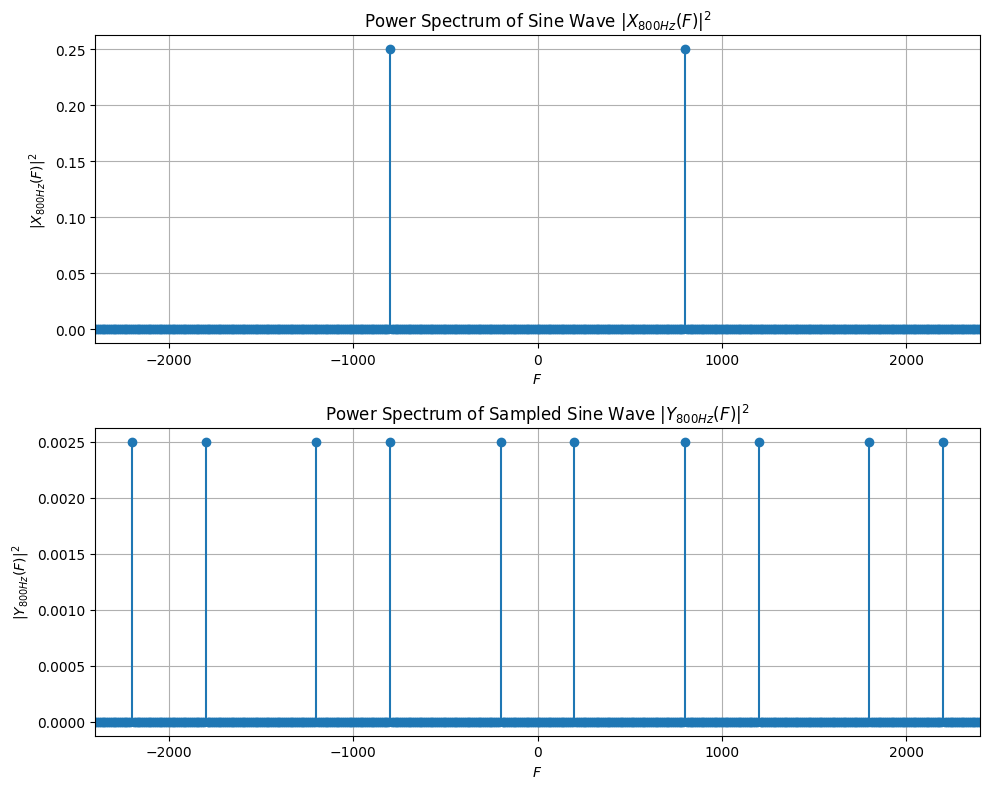

Unsampled Sine Wave Frequency Components and Power (800 Hz):
Frequency: 800.00 Hz, Power: 0.250000
Frequency: -800.00 Hz, Power: 0.250000

Sampled Sine Wave Frequency Components and Power (800 Hz):
Frequency: 200.00 Hz, Power: 0.250000
Frequency: 800.00 Hz, Power: 0.250000
Frequency: 1200.00 Hz, Power: 0.250000
Frequency: 1800.00 Hz, Power: 0.250000
Frequency: 2200.00 Hz, Power: 0.250000
Frequency: 2800.00 Hz, Power: 0.250000
Frequency: 3200.00 Hz, Power: 0.250000
Frequency: 3800.00 Hz, Power: 0.250000
Frequency: 4200.00 Hz, Power: 0.250000
Frequency: 4800.00 Hz, Power: 0.250000
Frequency: -4800.00 Hz, Power: 0.250000
Frequency: -4200.00 Hz, Power: 0.250000
Frequency: -3800.00 Hz, Power: 0.250000
Frequency: -3200.00 Hz, Power: 0.250000
Frequency: -2800.00 Hz, Power: 0.250000
Frequency: -2200.00 Hz, Power: 0.250000
Frequency: -1800.00 Hz, Power: 0.250000
Frequency: -1200.00 Hz, Power: 0.250000
Frequency: -800.00 Hz, Power: 0.250000
Frequency: -200.00 Hz, Power: 0.250000


In [64]:
# Change the frequency of the sine wave to 800 Hz
x_800Hz = np.sin(2 * np.pi * 800 * t)

# Compute the sampled sine wave y(t) by multiplying x_800Hz with p(t)
y_800Hz = x_800Hz * p

# Plot the time domain signals x_800Hz(t), p(t), and y_800Hz(t)
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Plot x_800Hz(t)
ax[0].plot(t, x_800Hz)
ax[0].set_xlim([0, 0.05])
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x_{800Hz}(t)$')
ax[0].set_title('Sine Wave $x_{800Hz}(t)$')
ax[0].grid(True)

# Plot p(t)
ax[1].plot(t, p)
ax[1].set_xlim([0, 0.05])
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$p(t)$')
ax[1].set_title('Pulse Train $p(t)$')
ax[1].grid(True)

# Plot y_800Hz(t)
ax[2].plot(t, y_800Hz)
ax[2].set_xlim([0, 0.05])
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$y_{800Hz}(t)$')
ax[2].set_title('Sampled Sine Wave $y_{800Hz}(t)$')
ax[2].grid(True)

plt.tight_layout()
plt.show()

# Compute the power spectrum of the sine wave, pulse train, and sampled sine wave using DFT

# Compute the DFT of the sine wave x_800Hz(t)
X_800Hz = fft(x_800Hz) / N

# Compute the power spectrum of the sine wave |X_800Hz(F)|^2
Xp_800Hz = np.abs(X_800Hz) ** 2

# Compute the DFT of the sampled sine wave y_800Hz(t)
Y_800Hz = fft(y_800Hz) / N

# Compute the power spectrum of the sampled sine wave |Y_800Hz(F)|^2
Yp_800Hz = np.abs(Y_800Hz) ** 2

# Plot the power spectrum of the frequency domain signals |X_800Hz(F)|^2 and |Y_800Hz(F)|^2
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot |X_800Hz(F)|^2
ax[0].stem(F, Xp_800Hz, basefmt=" ")
ax[0].set_xlim([-2400, 2400])
ax[0].set_xlabel('$F$')
ax[0].set_ylabel('$|X_{800Hz}(F)|^2$')
ax[0].set_title('Power Spectrum of Sine Wave $|X_{800Hz}(F)|^2$')
ax[0].grid(True)

# Plot |Y_800Hz(F)|^2
ax[1].stem(F, Yp_800Hz, basefmt=" ")
ax[1].set_xlim([-2400, 2400])
ax[1].set_xlabel('$F$')
ax[1].set_ylabel('$|Y_{800Hz}(F)|^2$')
ax[1].set_title('Power Spectrum of Sampled Sine Wave $|Y_{800Hz}(F)|^2$')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Record the frequency components and their power for the unsampled and sampled sine waves

# Record the frequency components and their power for the unsampled sine wave x_800Hz(t)
unsampled_freq_components_800Hz = F[np.where(Xp_800Hz > 1e-6)]
unsampled_power_components_800Hz = Xp_800Hz[np.where(Xp_800Hz > 1e-6)]

# Record the frequency components and their power for the sampled sine wave y_800Hz(t)
sampled_freq_components_800Hz = F[np.where(Yp_800Hz > 1e-6)]
sampled_power_components_800Hz = Yp_800Hz[np.where(Yp_800Hz > 1e-6)] * (Fsim / Fs) ** 2

# Print the frequency components and their power for the unsampled sine wave
print("Unsampled Sine Wave Frequency Components and Power (800 Hz):")
for freq, power in zip(unsampled_freq_components_800Hz, unsampled_power_components_800Hz):
    print(f"Frequency: {freq:.2f} Hz, Power: {power:.6f}")

# Print the frequency components and their power for the sampled sine wave
print("\nSampled Sine Wave Frequency Components and Power (800 Hz):")
for freq, power in zip(sampled_freq_components_800Hz, sampled_power_components_800Hz):
    print(f"Frequency: {freq:.2f} Hz, Power: {power:.6f}")

### 7. Change Pulse Width to 4 Samples

In the time domain with a 4-sample pulse width, p(t) captures more continuous segments of x(t) , making y(t) resemble x(t) in short bursts but still with noticeable gaps.

For the frequency domain the p(t) concentrates more energy at lower frequencies, affecting |P(F)|^2 and lowering the strenght at higher frequency components.

In our power spectrum we observe that |Y(F)|^2 should show strong peaks magnitudes are altered due to the wider sampling intervals. The frequency component plot results with the new pulse width reveals significant frequency components and their power, highlighting how pulse width influences sampled frequency strength in y(t).


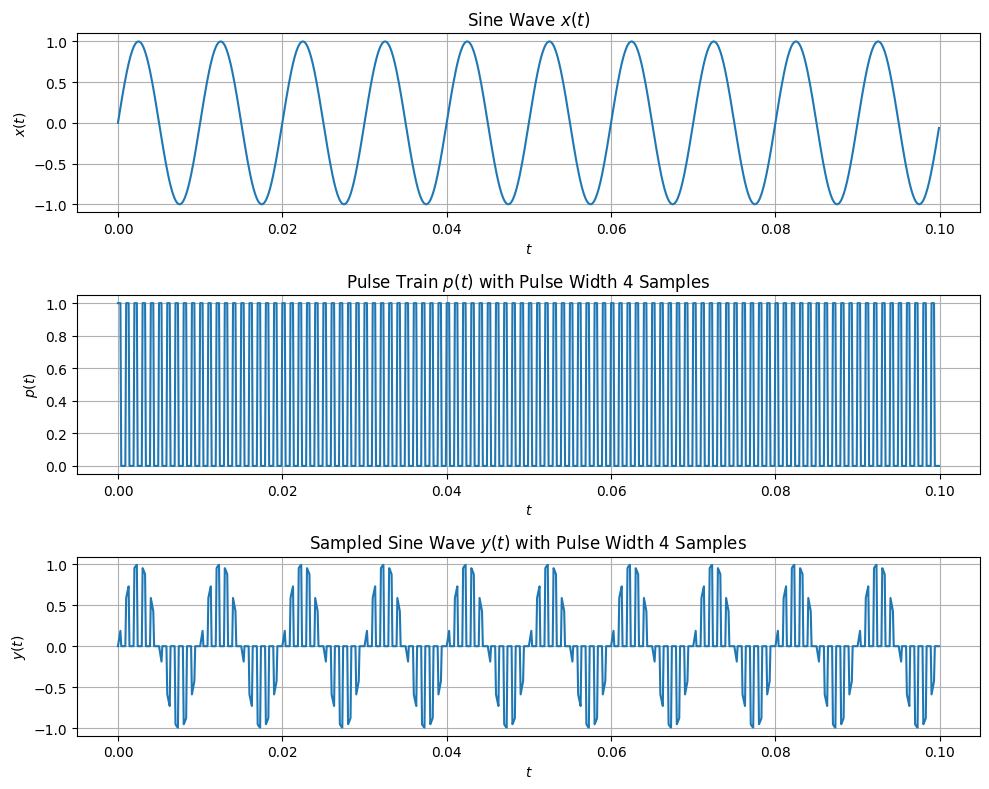

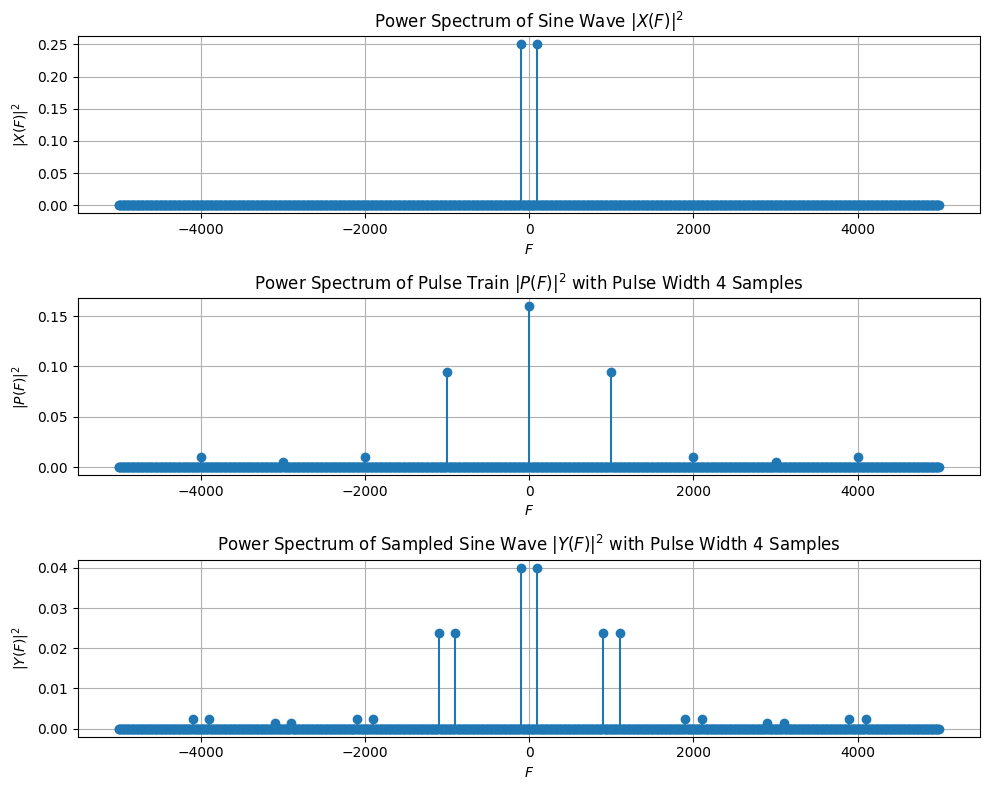


Sampled Sine Wave Frequency Components and Power with Pulse Width 4 Samples:
Frequency: 100.00 Hz, Power: 4.000000
Frequency: 900.00 Hz, Power: 2.368034
Frequency: 1100.00 Hz, Power: 2.368034
Frequency: 1900.00 Hz, Power: 0.250000
Frequency: 2100.00 Hz, Power: 0.250000
Frequency: 2900.00 Hz, Power: 0.131966
Frequency: 3100.00 Hz, Power: 0.131966
Frequency: 3900.00 Hz, Power: 0.250000
Frequency: 4100.00 Hz, Power: 0.250000
Frequency: -4100.00 Hz, Power: 0.250000
Frequency: -3900.00 Hz, Power: 0.250000
Frequency: -3100.00 Hz, Power: 0.131966
Frequency: -2900.00 Hz, Power: 0.131966
Frequency: -2100.00 Hz, Power: 0.250000
Frequency: -1900.00 Hz, Power: 0.250000
Frequency: -1100.00 Hz, Power: 2.368034
Frequency: -900.00 Hz, Power: 2.368034
Frequency: -100.00 Hz, Power: 4.000000


In [65]:
# Change the pulse width to 4 samples
pulse_width = 4

# Generate the pulse train signal p(t) with the new pulse width
p = np.arange(N) % train_period < pulse_width

# Compute the sampled sine wave y(t) by multiplying x(t) with the new p(t)
y = x * p

# Plot the time domain signals x(t), p(t), and y(t) with the new pulse width
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Plot x(t)
ax[0].plot(t, x)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')
ax[0].set_title('Sine Wave $x(t)$')
ax[0].grid(True)

# Plot p(t)
ax[1].plot(t, p)
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$p(t)$')
ax[1].set_title('Pulse Train $p(t)$ with Pulse Width 4 Samples')
ax[1].grid(True)

# Plot y(t)
ax[2].plot(t, y)
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$y(t)$')
ax[2].set_title('Sampled Sine Wave $y(t)$ with Pulse Width 4 Samples')
ax[2].grid(True)

plt.tight_layout()
plt.show()

# Compute the power spectrum of the sine wave, pulse train, and sampled sine wave using DFT

# Compute the DFT of the pulse train p(t) with the new pulse width
P = fft(p) / N

# Compute the power spectrum of the pulse train |P(F)|^2 with the new pulse width
Pp = np.abs(P) ** 2

# Compute the DFT of the sampled sine wave y(t) with the new pulse width
Y = fft(y) / N

# Compute the power spectrum of the sampled sine wave |Y(F)|^2 with the new pulse width
Yp = np.abs(Y) ** 2

# Plot the power spectrum of the frequency domain signals |X(F)|^2, |P(F)|^2, and |Y(F)|^2 with the new pulse width
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Plot |X(F)|^2
ax[0].stem(F, Xp, basefmt=" ")
ax[0].set_xlabel('$F$')
ax[0].set_ylabel('$|X(F)|^2$')
ax[0].set_title('Power Spectrum of Sine Wave $|X(F)|^2$')
ax[0].grid(True)

# Plot |P(F)|^2 with the new pulse width
ax[1].stem(F, Pp, basefmt=" ")
ax[1].set_xlabel('$F$')
ax[1].set_ylabel('$|P(F)|^2$')
ax[1].set_title('Power Spectrum of Pulse Train $|P(F)|^2$ with Pulse Width 4 Samples')
ax[1].grid(True)

# Plot |Y(F)|^2 with the new pulse width
ax[2].stem(F, Yp, basefmt=" ")
ax[2].set_xlabel('$F$')
ax[2].set_ylabel('$|Y(F)|^2$')
ax[2].set_title('Power Spectrum of Sampled Sine Wave $|Y(F)|^2$ with Pulse Width 4 Samples')
ax[2].grid(True)

plt.tight_layout()
plt.show()

# Record the frequency components and their power for the sampled sine wave y(t) with the new pulse width

# Record the frequency components and their power for the sampled sine wave y(t) with the new pulse width
sampled_freq_components_new_pulse_width = F[np.where(Yp > 1e-6)]
sampled_power_components_new_pulse_width = Yp[np.where(Yp > 1e-6)] * (Fsim / Fs) ** 2

# Print the frequency components and their power for the sampled sine wave with the new pulse width
print("\nSampled Sine Wave Frequency Components and Power with Pulse Width 4 Samples:")
for freq, power in zip(sampled_freq_components_new_pulse_width, sampled_power_components_new_pulse_width):
    print(f"Frequency: {freq:.2f} Hz, Power: {power:.6f}")

### 8. Design Chebyshev Low Pass Filter
Designing the Chebyshev Low Pass Filter with the provided code.

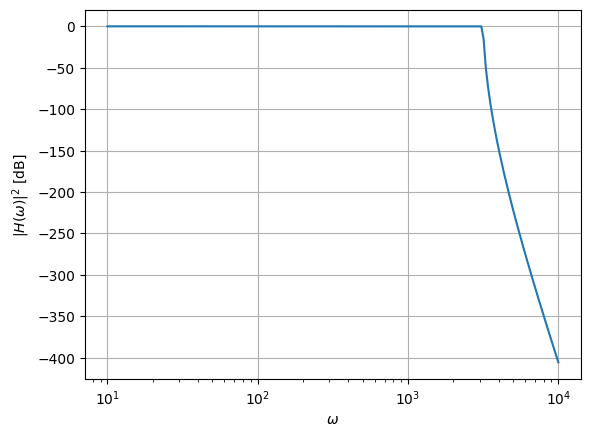

In [66]:
from scipy import signal
# passband cut-off frequency
wp = 2 * np.pi * 500
# stopband edge frequency
ws = 2 * np.pi * 550
# maximum loss in passband (dB)
rp = 0.1
# minimum attenuation in stopband (dB)
rs = 80
# determine the order of the Chebyshev filter
[n, wn] = signal.cheb1ord(
wp, ws, rp, rs, analog=True
)
# determine the transfer function
[b, a] = signal.cheby1(n, rp, wn, analog=True)
# determine the response of the filter
[w, h] = signal.freqs(b, a)
# plot the response
fig, ax = plt.subplots()
ax.semilogx(w, 20 * np.log10(abs(h)))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$|H(\\omega)|^2$ [dB]')
ax.grid(True)
plt.show()



### 9. 400Hz Filtering
Simulate the filter operation on the sampled sine wave with a frequency of 400 Hz and plot the results.

In our plot The sine wave x(t) oscillates at 400 Hz, while r(t) reperesents the filtered verison of y(t) after passing through the system.

The pulse wave width is set back to 1 to caputre specific segments only.

The filtering on r(t) is basically taking the noise y(t) and removing out the high frequencies componenets, to smoothen the signal out, This smoothening prevents the signal from having sharp edges and lots of bouncing around. That is reachiving the smooth trigometric wave feature of x(t) in r(t).

A shift or displacement from the original signal is observed in the filtered signal r(t) due to the filter operation.



/tmp/ipykernel_76122/3459219898.py:15: DeprecationWarning: lsim2 is deprecated and will be removed from scipy 1.13. Use the feature-equivalent lsim function.
  tr, r, state = signal.lsim2((b, a), y_400Hz, t)


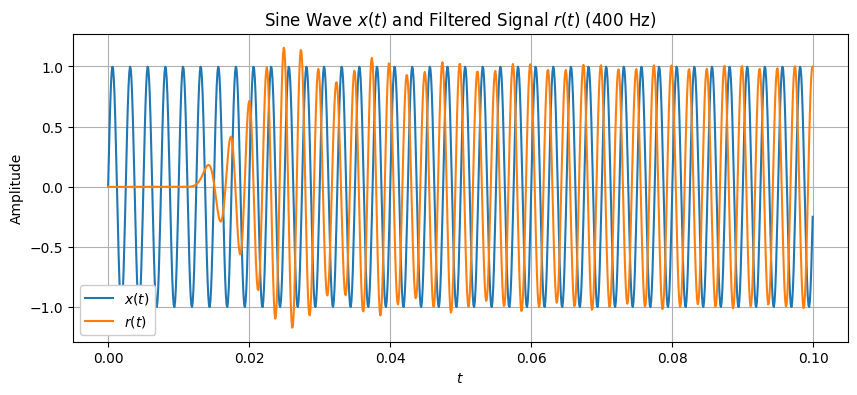

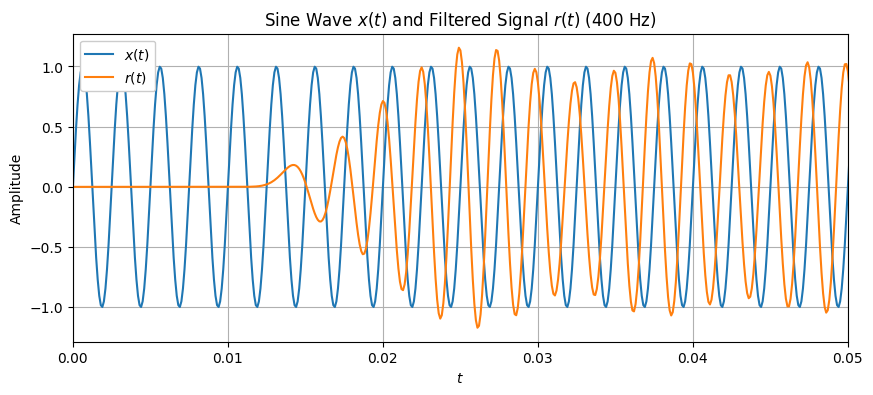

In [67]:
# Change the frequency of the sinusoidal signal x(t) to 400 Hz
x_400Hz = np.sin(2 * np.pi * 400 * t)

# Reddefine the pulse train signal p(t) with the new pulse width
train_period = 10
pulse_width = 1

# Generate the pulse train signal p(t)
p = np.arange(N) % train_period < pulse_width

# Compute the sampled sine wave y(t) by multiplying x_400Hz with p(t)
y_400Hz = x_400Hz * p

# Simulate the filter operation
tr, r, state = signal.lsim2((b, a), y_400Hz, t)

# Plot x(t) and r(t)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, x_400Hz, label='$x(t)$')
ax.plot(tr, train_period * r, label='$r(t)$')
ax.set_xlabel('$t$')
ax.set_ylabel('Amplitude')
ax.set_title('Sine Wave $x(t)$ and Filtered Signal $r(t)$ (400 Hz)')
ax.legend(loc='best', framealpha=1)
ax.grid(True)
plt.show()

# Zoom in to show the 400 Hz sine wave and the filtered signal
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, x_400Hz, label='$x(t)$')
ax.plot(tr, train_period * r, label='$r(t)$')
ax.set_xlim([0, 0.05])
ax.set_xlabel('$t$')
ax.set_ylabel('Amplitude')
ax.set_title('Sine Wave $x(t)$ and Filtered Signal $r(t)$ (400 Hz)')
ax.legend(loc='best', framealpha=1)
ax.grid(True)
plt.show()

### 600Hz Filtering
Change the frequency of the sine wave to 600 Hz, re-run the filter operation, and compare the results to the 400 Hz case.

Since the frequency of the sine wave has been increase to 600 Hz. We obviously expect r(t) to have more frequency oscillations than previous result in part 9. Since we keep the pulse train the same but increase the frequency,the sampling interval may not fully capture the details of the 600 Hz waveform, leading to possible aliasing effects. However, from the plots this can not be seen as a identifiable problem visually.

The higher frequency introduces more rapid variations that are filtered out, leading to a signal that closely matches the characteristics of the filter's cutoff. So in the 600 Hz case, the filter is able to smoothen but may not preserve the original high frequency oscillations as good as for the 400 Hz case. So greater distortion from the original signal is expected to be seen in the 600 Hz case.

/tmp/ipykernel_76122/538464794.py:8: DeprecationWarning: lsim2 is deprecated and will be removed from scipy 1.13. Use the feature-equivalent lsim function.
  tr, r, state = signal.lsim2((b, a), U=y_600Hz, T=t)


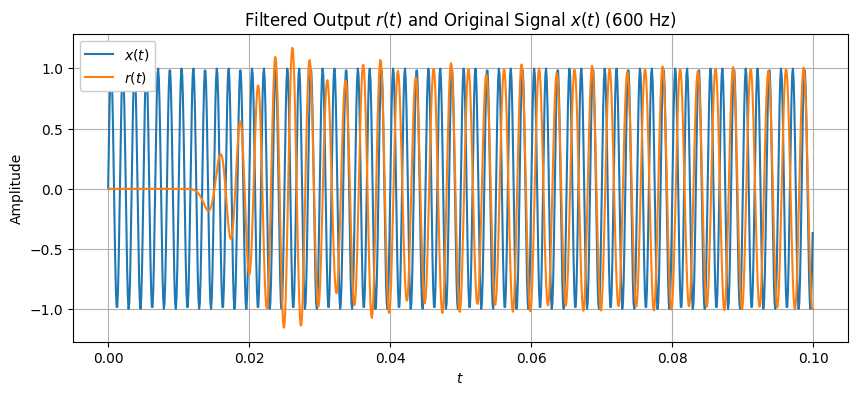

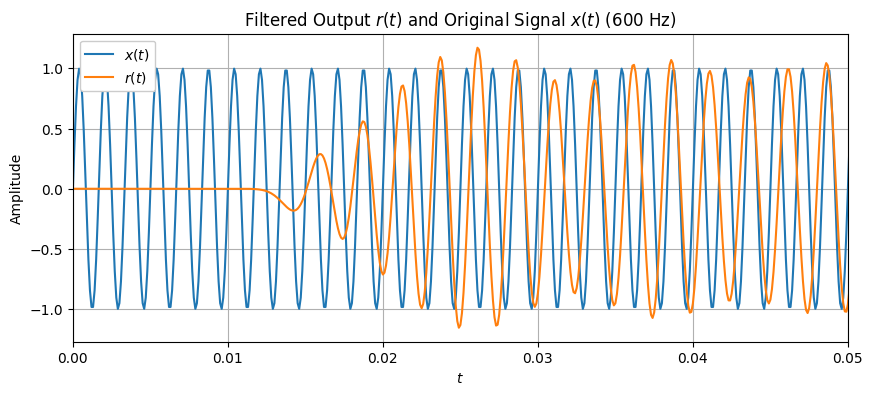

In [68]:
# Change the frequency of the sinusoidal signal x(t) to 600 Hz
x_600Hz = np.sin(2 * np.pi * 600 * t)

# Compute the sampled sine wave y(t) by multiplying x_600Hz with p(t)
y_600Hz = x_600Hz * p

# Simulate the filter operation
tr, r, state = signal.lsim2((b, a), U=y_600Hz, T=t)

# Plot x(t) and r(t)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, x_600Hz, label='$x(t)$')
ax.plot(tr, train_period * r, label='$r(t)$')
ax.set_xlabel('$t$')
ax.set_ylabel('Amplitude')
ax.set_title('Filtered Output $r(t)$ and Original Signal $x(t)$ (600 Hz)')
ax.legend(loc='best', framealpha=1)
ax.grid(True)
plt.show()

# Zoom in to show the 600 Hz sine wave and the filtered signal
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, x_600Hz, label='$x(t)$')
ax.plot(tr, train_period * r, label='$r(t)$')
ax.set_xlim([0, 0.05])
ax.set_xlabel('$t$')
ax.set_ylabel('Amplitude')
ax.set_title('Filtered Output $r(t)$ and Original Signal $x(t)$ (600 Hz)')
ax.legend(loc='best', framealpha=1)
ax.grid(True)
plt.show()
